## TASK 2 : Santral Üretim Tahmini

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_excel('powerplant_data.xlsx', index_col=0)

In [4]:
df.head()

,instrument,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
0,2020-01-01 00:00:00.000000,0.640,0.000,0.045376,0.026701,0.021143,0.036322,0.020318,0.000
1,2020-01-01 00:59:59.999999,0.650,0.000,0.041271,0.016510,0.034583,0.028692,0.038147,0.000
2,2020-01-01 02:00:00.000001,0.635,0.325,0.039892,0.520764,0.554837,0.651030,0.138745,0.000
3,2020-01-01 03:00:00.000000,0.515,0.000,0.039533,0.040981,0.028857,0.017618,0.030898,0.325
4,2020-01-01 03:59:59.999999,0.450,0.000,0.030361,0.035847,0.024929,0.035401,0.036201,0.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8776 entries, 0 to 8775
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   instrument                        8776 non-null   datetime64[ns]
 1   forecast_t-75m_value              8776 non-null   float64       
 2   generation_meteredby_device_t-0h  8776 non-null   float64       
 3   powerplantdata_t-0h_part0         8776 non-null   float64       
 4   powerplantdata_t-0h_part1         8776 non-null   float64       
 5   powerplantdata_t-0h_part2         8776 non-null   float64       
 6   powerplantdata_t-0h_part3         8776 non-null   float64       
 7   powerplantdata_t-0h_part4         8776 non-null   float64       
 8   generation_meteredby_device_t-1h  8776 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 685.6 KB


In [6]:
df.describe()

,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,14.663482,14.572158,14.488336,14.508861,14.518485,14.494598,14.507855,14.569554
std,12.787253,13.641425,13.713459,13.717060,13.714080,13.697697,13.716914,13.642056
min,0.050000,-0.130000,-0.177300,-0.158119,-0.164185,-0.149254,-1.256736,-0.130000
25%,2.145000,1.480000,1.373237,1.402131,1.428789,1.398758,1.384714,1.478750
50%,11.207500,10.202500,10.004761,10.056867,10.043475,9.962483,9.952808,10.197500
75%,26.831250,27.641250,27.500932,27.660097,27.650077,27.744701,27.851845,27.641250
max,38.230000,38.715000,38.829799,38.794637,38.772266,38.780023,38.775430,38.715000


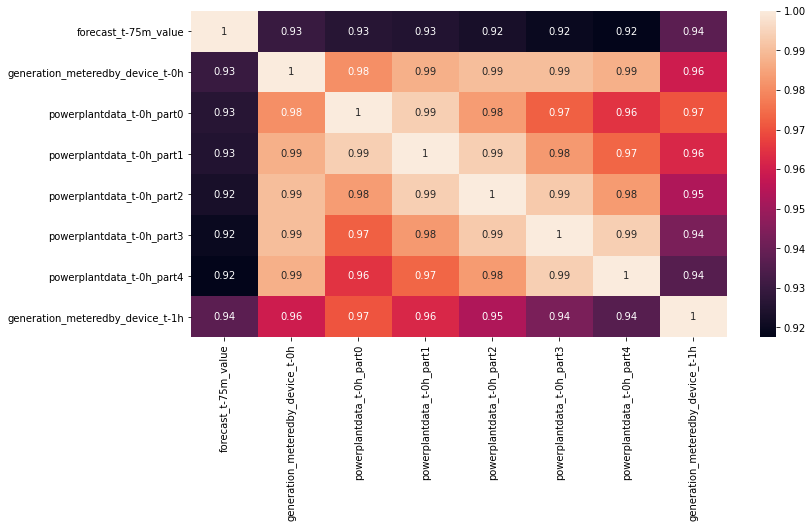

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
df[(df['instrument'] >= '2020-10-01') & (df['instrument'] < '2021-01-01')]

,instrument,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
6567,2020-10-01 00:00:00.000000,0.625,0.115,-0.064147,-0.003054,0.159694,0.298086,0.136832,0.025
6568,2020-10-01 00:59:59.999999,0.610,0.090,0.291903,0.063694,-0.085682,-0.125032,0.001089,0.115
6569,2020-10-01 02:00:00.000001,0.960,0.065,0.214622,-0.056262,-0.107350,-0.128895,0.041804,0.090
6570,2020-10-01 03:00:00.000000,1.385,0.475,0.377538,0.600864,0.321710,0.420797,0.524851,0.065
6571,2020-10-01 03:59:59.999999,1.010,0.235,0.637593,0.418802,0.344800,0.231238,0.041793,0.475
...,...,...,...,...,...,...,...,...,...
8770,2020-12-31 18:59:59.999999,33.635,35.555,36.488404,35.970513,34.776159,34.327873,35.997701,35.885
8771,2020-12-31 20:00:00.000001,34.065,36.495,34.518909,35.868938,36.682375,37.195969,37.336583,35.555
8772,2020-12-31 21:00:00.000000,34.250,37.005,37.030349,37.158400,37.235866,36.988668,36.867310,36.495
8773,2020-12-31 21:59:59.999999,33.080,36.935,36.962253,36.831921,37.266634,38.518692,36.990068,37.005


* Santraller üretim tahmin değelerini ilgili t anının en geç 1 saat öncesine kadar ilgili kurumlara bildirmek zorunda oldukları için tarihlerde kaydırma yaptık.

In [9]:
df2 = df[df['instrument'] > '2020-10-01 00:00']
df2

,instrument,forecast_t-75m_value,generation_meteredby_device_t-0h,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4,generation_meteredby_device_t-1h
6568,2020-10-01 00:59:59.999999,0.610,0.090,0.291903,0.063694,-0.085682,-0.125032,0.001089,0.115
6569,2020-10-01 02:00:00.000001,0.960,0.065,0.214622,-0.056262,-0.107350,-0.128895,0.041804,0.090
6570,2020-10-01 03:00:00.000000,1.385,0.475,0.377538,0.600864,0.321710,0.420797,0.524851,0.065
6571,2020-10-01 03:59:59.999999,1.010,0.235,0.637593,0.418802,0.344800,0.231238,0.041793,0.475
6572,2020-10-01 05:00:00.000001,0.850,-0.085,0.010968,-0.100099,-0.107280,-0.103607,-0.103692,0.235
...,...,...,...,...,...,...,...,...,...
8771,2020-12-31 20:00:00.000001,34.065,36.495,34.518909,35.868938,36.682375,37.195969,37.336583,35.555
8772,2020-12-31 21:00:00.000000,34.250,37.005,37.030349,37.158400,37.235866,36.988668,36.867310,36.495
8773,2020-12-31 21:59:59.999999,33.080,36.935,36.962253,36.831921,37.266634,38.518692,36.990068,37.005
8774,2020-12-31 23:00:00.000001,28.855,29.880,33.615321,32.713004,27.669085,27.850444,30.385332,36.935


In [10]:
df2 = df2.drop(['generation_meteredby_device_t-0h','generation_meteredby_device_t-1h'], axis=1)

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 6568 to 8775
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   instrument                 2208 non-null   datetime64[ns]
 1   forecast_t-75m_value       2208 non-null   float64       
 2   powerplantdata_t-0h_part0  2208 non-null   float64       
 3   powerplantdata_t-0h_part1  2208 non-null   float64       
 4   powerplantdata_t-0h_part2  2208 non-null   float64       
 5   powerplantdata_t-0h_part3  2208 non-null   float64       
 6   powerplantdata_t-0h_part4  2208 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 138.0 KB


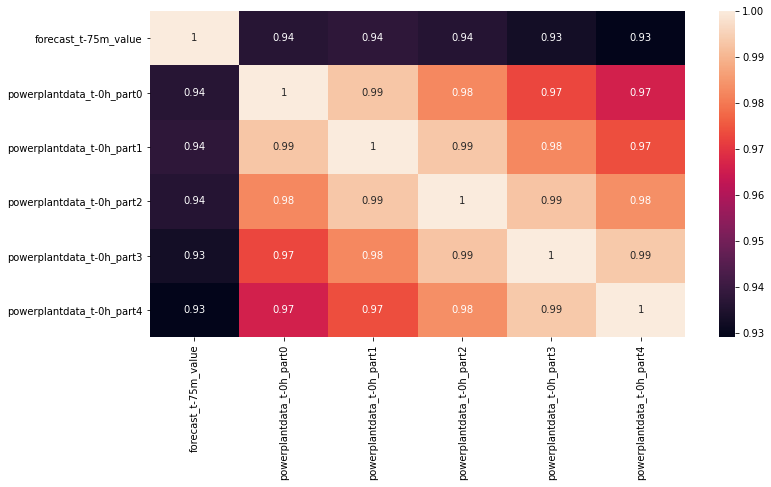

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(),annot=True)
plt.show()

<Figure size 720x432 with 0 Axes>

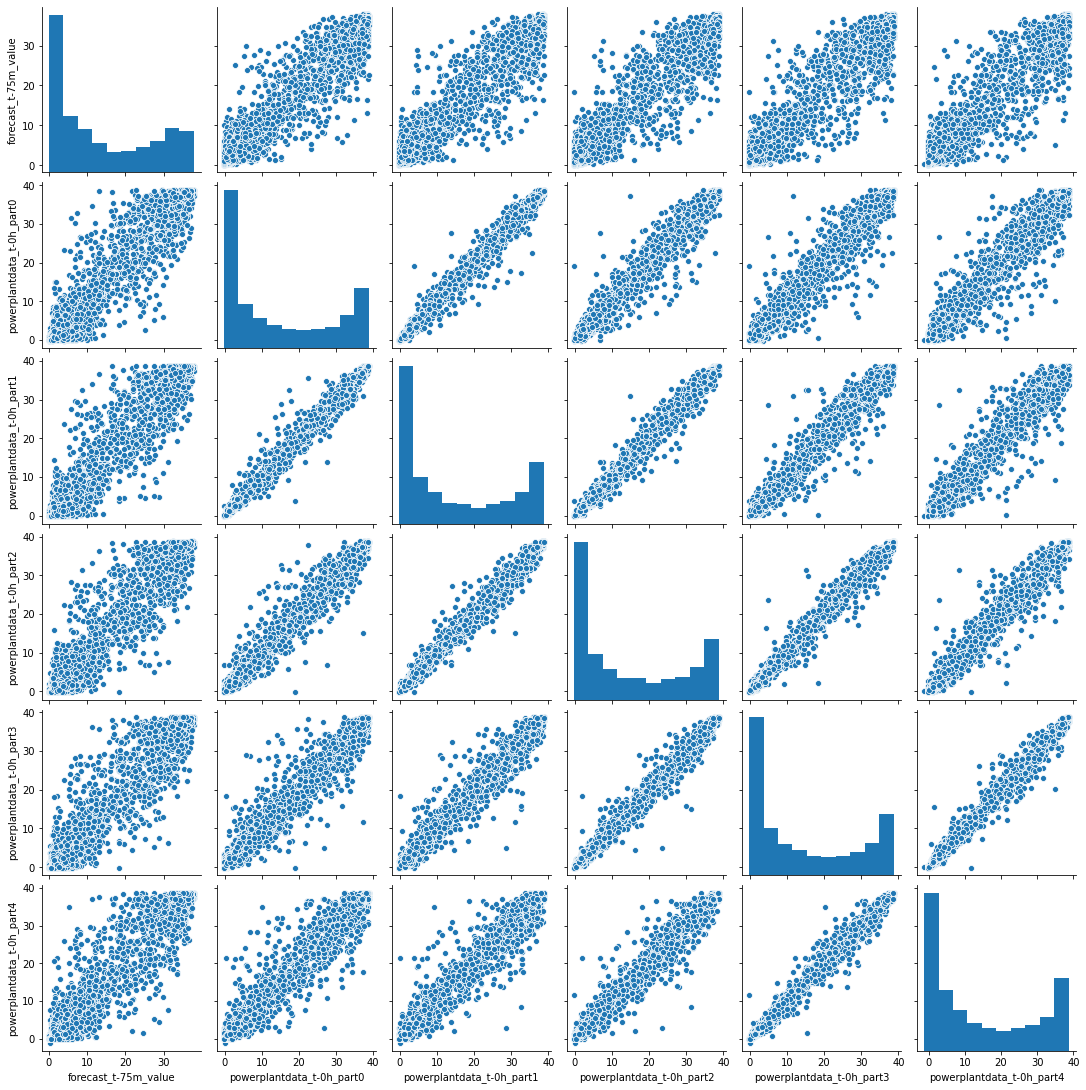

In [13]:
plt.figure(figsize=(10,6))
sns.pairplot(df2)
plt.show()

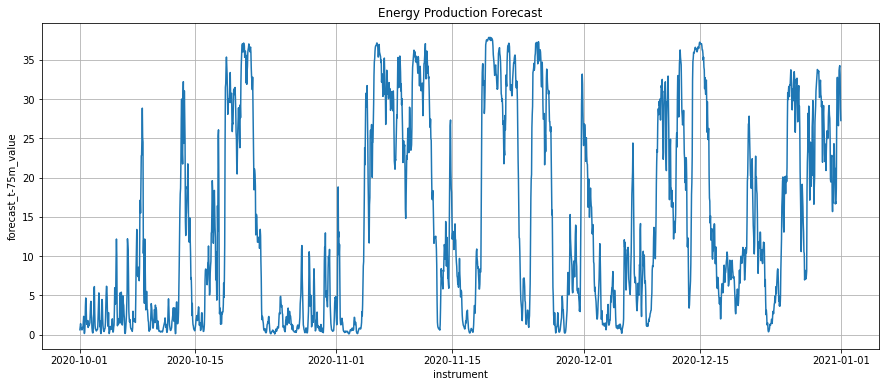

In [14]:
plt.figure(figsize=(15,6))
sns.lineplot(x="instrument", y="forecast_t-75m_value", data=df2, err_style=None)
plt.grid(True)
plt.title("Energy Production Forecast")
plt.show()

In [88]:
df['powerplantdata_t-0h_part1'].value_counts()

5.801667     86
29.796669    43
0.740000     26
11.161667    19
29.796669    19
             ..
2.906376      1
37.916816     1
0.040378      1
1.217695      1
0.682417      1
Name: powerplantdata_t-0h_part1, Length: 8467, dtype: int64

In [89]:
df['powerplantdata_t-0h_part2'].value_counts()

 5.801667     89
 29.796669    35
 29.796669    28
 0.740000     26
 0.000000     20
              ..
 3.507061      1
 25.479777     1
 13.391090     1
-0.093703      1
 23.969923     1
Name: powerplantdata_t-0h_part2, Length: 8437, dtype: int64

In [90]:
df['powerplantdata_t-0h_part3'].value_counts()

5.801667     87
29.796669    34
29.796669    29
0.740000     25
11.161667    19
             ..
7.642596      1
3.967988      1
0.420929      1
8.277816      1
16.385812     1
Name: powerplantdata_t-0h_part3, Length: 8465, dtype: int64

In [97]:
df['powerplantdata_t-0h_part4'].sample(50)

1223    37.830011
7998     9.113506
5963     9.200643
7227     0.869434
2100    -0.107837
8365    38.701239
8510    20.965570
2801    10.183333
2909    -0.040032
8648    31.704150
8463     8.035994
2639    -0.091255
7996     4.854777
6471    21.017581
8605    17.547649
8003    27.324162
8214     2.353391
3402    37.154526
3581     1.724956
2702    31.121932
2365    32.150035
4327     9.657646
2685    35.060513
171     16.564872
432     18.881592
3618     1.565859
2081     4.795598
424     30.728755
4887    32.279453
7964     8.820956
7085    19.156790
6909     4.107158
8126     0.035000
5391    18.985985
7495    35.697700
3626     2.341831
4270    17.245638
2535    38.396609
1495    33.846093
3152     2.164598
2499     8.643001
8134     0.410000
2567     0.037649
5747    16.226582
7828    36.386834
7072    24.589043
4701     9.010273
4712    21.534736
811     31.066239
52      24.138474
Name: powerplantdata_t-0h_part4, dtype: float64

In [15]:
df2 = df2.set_index("instrument")
df2.head()

,forecast_t-75m_value,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,,
2020-10-01 00:59:59.999999,0.610,0.291903,0.063694,-0.085682,-0.125032,0.001089
2020-10-01 02:00:00.000001,0.960,0.214622,-0.056262,-0.107350,-0.128895,0.041804
2020-10-01 03:00:00.000000,1.385,0.377538,0.600864,0.321710,0.420797,0.524851
2020-10-01 03:59:59.999999,1.010,0.637593,0.418802,0.344800,0.231238,0.041793
2020-10-01 05:00:00.000001,0.850,0.010968,-0.100099,-0.107280,-0.103607,-0.103692


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2020-10-01 00:59:59.999999 to 2021-01-01 00:00:00
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   forecast_t-75m_value       2208 non-null   float64
 1   powerplantdata_t-0h_part0  2208 non-null   float64
 2   powerplantdata_t-0h_part1  2208 non-null   float64
 3   powerplantdata_t-0h_part2  2208 non-null   float64
 4   powerplantdata_t-0h_part3  2208 non-null   float64
 5   powerplantdata_t-0h_part4  2208 non-null   float64
dtypes: float64(6)
memory usage: 120.8 KB


In [17]:
X=df2.drop(["forecast_t-75m_value"], axis=1)
y=df2["forecast_t-75m_value"]

In [18]:
X.head()

,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,
2020-10-01 00:59:59.999999,0.291903,0.063694,-0.085682,-0.125032,0.001089
2020-10-01 02:00:00.000001,0.214622,-0.056262,-0.107350,-0.128895,0.041804
2020-10-01 03:00:00.000000,0.377538,0.600864,0.321710,0.420797,0.524851
2020-10-01 03:59:59.999999,0.637593,0.418802,0.344800,0.231238,0.041793
2020-10-01 05:00:00.000001,0.010968,-0.100099,-0.107280,-0.103607,-0.103692


In [19]:
y.head()

instrument
2020-10-01 00:59:59.999999    0.610
2020-10-01 02:00:00.000001    0.960
2020-10-01 03:00:00.000000    1.385
2020-10-01 03:59:59.999999    1.010
2020-10-01 05:00:00.000001    0.850
Name: forecast_t-75m_value, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [37]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
lm.intercept_

1.7490247323811356

In [40]:
lm.coef_

array([ 0.36096528,  0.1422855 ,  0.13485152, -0.08536715,  0.29891434])

In [41]:
coeff_parameter = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_parameter

,Coefficient
powerplantdata_t-0h_part0,0.360965
powerplantdata_t-0h_part1,0.142285
powerplantdata_t-0h_part2,0.134852
powerplantdata_t-0h_part3,-0.085367
powerplantdata_t-0h_part4,0.298914


In [42]:
y_pred=lm.predict(X_test)

In [43]:
eval_metrics(y_test, y_pred)

r2_score: 0.8934740835518814 
 mae: 2.823766787405974 
 mse: 17.260967438546786 
 rmse: 4.154632046107908


In [44]:
y_pred_train = lm.predict(X_train)

In [45]:
eval_metrics(y_train, y_pred_train)

r2_score: 0.8844460688041944 
 mae: 3.0540564695100882 
 mse: 18.380331995314606 
 rmse: 4.287228941322659


In [46]:
my_dict={"Actual":y_test, "Pred":y_pred}
compare=pd.DataFrame(my_dict)

In [47]:
compare.sample(10)

,Actual,Pred
instrument,,
2020-11-28 00:00:00.000000,0.325,1.659452
2020-10-03 23:00:00.000001,0.380,1.657189
2020-10-21 15:00:00.000000,36.390,34.599966
2020-10-08 00:59:59.999999,7.380,22.908000
2020-11-03 15:59:59.999999,0.405,1.659788
2020-11-21 02:00:00.000001,30.035,24.551816
2020-11-03 17:00:00.000001,0.520,1.662011
2020-12-22 09:59:59.999999,9.995,6.054236
2020-11-27 15:59:59.999999,1.010,3.073058


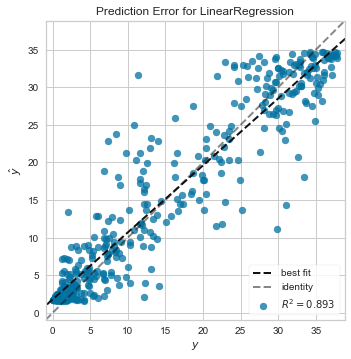

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = lm
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

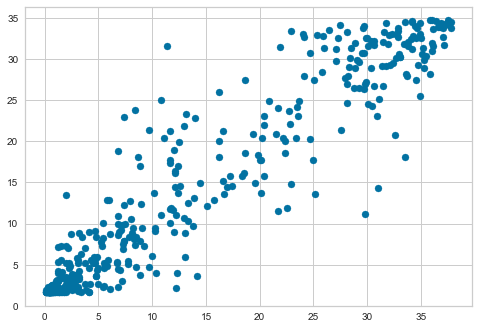

In [49]:
plt.scatter(y_test, y_pred)

## model score with cv

In [50]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8831400408721013

In [51]:
accuraries

array([0.87965567, 0.86474655, 0.87951048, 0.88990293, 0.90975474,
       0.87425022, 0.87265152, 0.90169835, 0.87215213, 0.88707783])

## Ridge Regression

In [52]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(X_train)

StandardScaler()

In [56]:
X_train.head()

,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
instrument,,,,,
2020-11-05 00:59:59.999999,29.493694,27.866805,21.732111,26.515903,21.635798
2020-12-22 03:59:59.999999,18.283344,18.743629,19.906895,19.406589,14.526106
2020-12-27 21:00:00.000000,21.441589,17.281600,12.703751,16.617420,18.540656
2020-12-12 03:59:59.999999,30.596143,32.389220,32.336841,31.929690,32.056843
2020-12-01 03:00:00.000000,28.143344,29.433604,33.076946,32.841553,32.670672


In [57]:
X_train = scaler.transform(X_train)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
a=pd.DataFrame(X_train, columns=X.columns)

In [60]:
a.head()

,powerplantdata_t-0h_part0,powerplantdata_t-0h_part1,powerplantdata_t-0h_part2,powerplantdata_t-0h_part3,powerplantdata_t-0h_part4
0,1.066090,0.947724,0.516466,0.864539,0.506614
1,0.268622,0.298357,0.385720,0.353526,-0.001570
2,0.493289,0.194293,-0.130266,0.153042,0.285381
3,1.144515,1.269619,1.276120,1.253679,1.251486
4,0.970031,1.059245,1.329136,1.319223,1.295361


In [61]:
ridge_model = Ridge()

In [62]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [63]:
eval_metrics(y_test, y_pred)

r2_score: 0.8937355835850267 
 mae: 2.821744001668049 
 mse: 17.218595181092443 
 rmse: 4.14952951322104


* Ridge Model ile r2_score biraz daha artmış oldu.

In [64]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8831989210638262

In [65]:
ridge_model.alpha

1.0

In [67]:
alpha_space = np.linspace(0.1, 20, 100)
alpha_space

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [68]:
#searching for best alpha

ridgecv = RidgeCV(alphas=alpha_space, cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=10)

In [69]:
# best alpha
ridgecv.alpha_

5.929292929292929

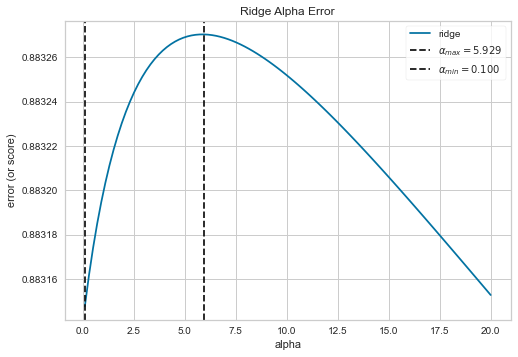

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [70]:
#let's find the same alpha with yellowbrick

from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [71]:
ridge_model = Ridge(5.9).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.894381697647793 
 mae: 2.816342673708126 
 mse: 17.113901842880917 
 rmse: 4.136895193606059


In [72]:
accuraries = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8832703270902217

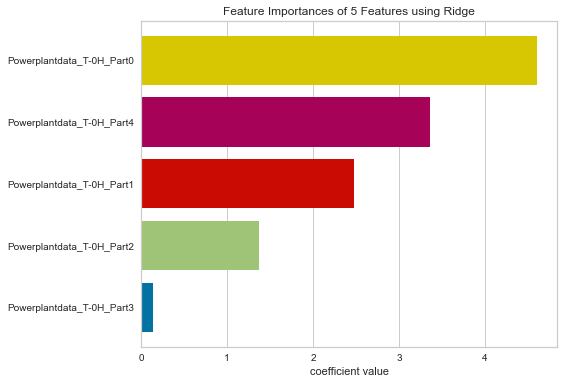

<AxesSubplot:title={'center':'Feature Importances of 5 Features using Ridge'}, xlabel='coefficient value'>

In [73]:
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(ridge_model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [74]:
ridge_model.coef_

array([4.60853156, 2.46928864, 1.36609177, 0.13228645, 3.35998185])

In [75]:
lm.coef_

array([ 0.36096528,  0.1422855 ,  0.13485152, -0.08536715,  0.29891434])

## Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [77]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.886987231248468 
 mae: 3.208960633009855 
 mse: 18.312067021833766 
 rmse: 4.279260102147773


In [78]:
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8767857177473413

In [79]:
lasso_model.alpha

1.0

In [80]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10).fit(X_train, y_train)

In [81]:
lasso_cv_model.alpha_

0.1

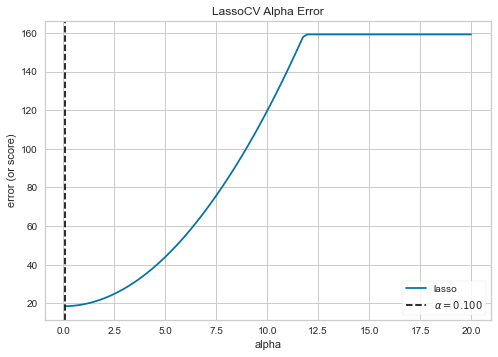

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [82]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [83]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)
accuraries.mean()

0.8767857177473413

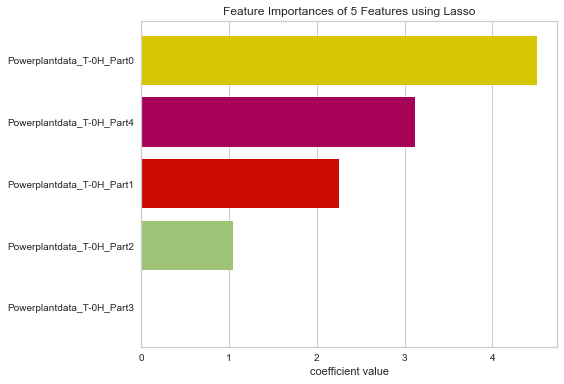

<AxesSubplot:title={'center':'Feature Importances of 5 Features using Lasso'}, xlabel='coefficient value'>

In [84]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()